# DESCRIPTION

### Background of Problem Statement :

#### The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

## Problem Objective :

#### The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

#### Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

### Domain: Finance and Housing

### Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

##### 1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.

#### 2. Handle missing values :

Fill the missing values with the mean of the respective column.

#### 3. Encode categorical data :

Convert categorical column in the dataset to numerical data.

#### 4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.

#### 5. Standardize data :

Standardize training and test datasets.

#### 6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

### 7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Dataset Description :


Field	Description
longitude	(signed numeric - float) : Longitude value for the block in California, USA

latitude	(numeric - float ) : Latitude value for the block in California, USA

housing_median_age	(numeric - int ) : Median age of the house in the block

total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block

total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block

population	(numeric - int ) : Count of the total number of population in the block

households	(numeric - int ) : Count of the total number of households in the block

median_income	(numeric - float ) : Median of the total household income of all the houses in the block

ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]

median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("/Users/anirudhagarwal/Desktop/Anirudh/OneDrive/Purdue DS Course/Course 5/My Project/P 2/housing.csv")

In [3]:
housing.head(5)    # To check all the columns and also to check whether the data has been loaded properly

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
housing1 = housing.copy()

In [5]:
housing1.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [6]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
hou= housing1.copy()

In [8]:
#Extract input (X) and output (Y) data from the dataset.
X = hou.iloc[:, :-1]                # all parameters except median_house_value are independent variables
Y = hou.iloc[:, [-1]]               # median_ house_value is dependent a variable

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [10]:
Y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [11]:
# To check the number of missing values in all columns
hou.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### total_bedrooms has 207 missing values as shown above.
### I will replace these values with the column's mean value

In [12]:
hou['total_bedrooms'] = hou['total_bedrooms'].fillna(value = hou['total_bedrooms'].mean())

In [13]:
hou.isna().sum()        # There are no blanks anymore

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### To convert categorical column of the data into numerical data
#### From the data , we can see that only ocean_proximity column has categories like 
#### NEAR BAY, INLAD, ISLAND , NEAR OCEAN AND <1HOCEAN.

In [14]:
housing1[['ocean_proximity']]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
hou['ocean_proximity'].nunique()

5

In [17]:
le = LabelEncoder()
hou['ocean_proximity']=le.fit_transform(hou['ocean_proximity'])

In [18]:
hou[['ocean_proximity']]  # Now the data is converted into numeric values

,ocean_proximity
0,3
1,3
2,3
3,3
4,3
...,...
20635,1
20636,1
20637,1
20638,1


### Split the data into 80% training dataset and 20% test dataset.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_set, test_set = train_test_split(hou, test_size=0.2, random_state=123)

In [21]:
train_set                    #16512 rows = 80% of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9950,-122.33,38.38,28,1020,169.000000,504,164,4.5694,1,287500
3547,-118.60,34.26,18,6154,1070.000000,3010,1034,5.6392,0,271500
4448,-118.21,34.07,47,1346,383.000000,1452,371,1.7292,0,191700
6984,-118.02,33.96,36,2071,398.000000,988,404,4.6226,0,219700
4432,-118.20,34.08,49,1320,309.000000,1405,328,2.4375,0,114000
...,...,...,...,...,...,...,...,...,...,...
7763,-118.10,33.91,36,726,537.870553,490,130,3.6389,0,167600
15377,-117.24,33.37,14,4687,793.000000,2436,779,4.5391,0,180900
17730,-121.76,37.33,5,4153,719.000000,2435,697,5.6306,0,286200
15725,-122.44,37.78,44,1545,334.000000,561,326,3.8750,3,412500


In [22]:
test_set                   #4128 rows = 20% of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19121,-122.64,38.24,40,1974,410.0,1039,398,3.7917,0,151600
20019,-119.05,36.09,9,3297,568.0,1749,568,4.0217,1,99200
15104,-116.98,32.85,12,3570,713.0,3321,666,4.0882,0,134500
3720,-118.42,34.20,27,3201,970.0,3403,948,2.2377,0,231700
8938,-118.47,34.01,41,2704,557.0,1047,478,4.4211,0,462900
...,...,...,...,...,...,...,...,...,...,...
313,-122.19,37.77,45,1852,393.0,1132,349,2.7159,3,101400
4596,-118.28,34.05,41,1788,774.0,2931,702,1.4413,0,158900
16287,-121.28,37.91,31,820,179.0,576,155,1.6900,1,65900
5771,-118.27,34.15,22,2265,637.0,1684,561,2.6729,0,217100


### Standardize training and test datasets

In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
#For training data set
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_set)
train_scaled = pd.DataFrame(train_scaled, columns = train_set.columns)
train_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.381195,1.289422,-0.045376,-0.737644,-0.875165,-0.822910,-0.873927,0.367714,-0.114849,0.697776
1,0.483377,-0.640792,-0.840169,1.587216,1.244474,1.394248,1.371062,0.930745,-0.819043,0.559141
2,0.678333,-0.729807,1.464730,-0.590019,-0.371721,0.015823,-0.339775,-1.127069,-0.819043,-0.132298
3,0.773311,-0.781342,0.590458,-0.261713,-0.336433,-0.394696,-0.254620,0.395713,-0.819043,0.110312
4,0.683331,-0.725122,1.623688,-0.601793,-0.545809,-0.025760,-0.450734,-0.754294,-0.819043,-0.805542
...,...,...,...,...,...,...,...,...,...,...
16507,0.733320,-0.804767,0.590458,-0.870778,-0.007382,-0.835297,-0.961663,-0.122003,-0.819043,-0.341117
16508,1.163221,-1.057756,-1.158086,0.922905,0.592820,0.886407,0.713048,0.351767,-0.819043,-0.225877
16509,-1.096261,0.797498,-1.873399,0.681091,0.418732,0.885522,0.501451,0.926219,-0.819043,0.686512
16510,-1.436183,1.008323,1.226292,-0.499905,-0.486996,-0.772480,-0.455895,0.002255,1.293538,1.780858


In [25]:
# For test data set
test_scaled = scaler.fit_transform(test_set)
test_scaled = pd.DataFrame(test_scaled, columns = test_set.columns)
test_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.517927,1.210235,0.880215,-0.294181,-0.292029,-0.308601,-0.246926,-0.041501,-0.827113,-0.475246
1,0.263269,0.206267,-1.581094,0.344857,0.108084,0.314001,0.224694,0.079642,-0.124288,-0.929643
2,1.290309,-1.306689,-1.342903,0.476722,0.475277,1.692495,0.496569,0.114668,-0.827113,-0.623532
3,0.575846,-0.676290,-0.151947,0.298487,1.126094,1.764401,1.278903,-0.860007,-0.827113,0.219358
4,0.551038,-0.765013,0.959612,0.058425,0.080228,-0.301586,-0.024988,0.290010,-0.827113,2.224256
...,...,...,...,...,...,...,...,...,...,...
4123,-1.294658,0.990763,1.277200,-0.353109,-0.335079,-0.227049,-0.382864,-0.608135,1.281361,-0.910565
4124,0.645308,-0.746335,0.959612,-0.384023,0.629751,1.350502,0.596441,-1.279478,-0.827113,-0.411942
4125,-0.843157,1.056138,0.165641,-0.851587,-0.877005,-0.714608,-0.921066,-1.148486,-0.124288,-1.218411
4126,0.650269,-0.699638,-0.548932,-0.153621,0.282817,0.257002,0.205274,-0.630783,-0.827113,0.092751


# Perform Linear Regression : 

### Perform Linear Regression on training data.
### Predict output for test dataset using the fitted model.
### Print root mean squared error (RMSE) from Linear Regression.

In [26]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()

In [27]:
#To classify X,Y variables from both training and testing data sets
X_train = train_scaled.iloc[:, :-1]
Y_train = train_scaled.iloc[:, [-1]]
X_test = test_scaled.iloc[:, :-1]
Y_test = test_scaled.iloc[:, [-1]]

In [28]:
# To check correlation amongst variables
corr_values = train_scaled.corr().round(2)
corr_values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.00,-0.92,-0.11,0.05,0.07,0.10,0.06,-0.01,-0.29,-0.04
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.08,-0.08,0.20,-0.15
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.31,-0.12,0.11,0.10
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.87,0.92,0.20,-0.02,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,-0.01,0.05
population,0.10,-0.11,-0.30,0.87,0.88,1.00,0.91,0.01,-0.07,-0.02
households,0.06,-0.08,-0.31,0.92,0.98,0.91,1.00,0.01,-0.02,0.06
median_income,-0.01,-0.08,-0.12,0.20,-0.01,0.01,0.01,1.00,-0.01,0.69
ocean_proximity,-0.29,0.20,0.11,-0.02,-0.01,-0.07,-0.02,-0.01,1.00,0.08
median_house_value,-0.04,-0.15,0.10,0.13,0.05,-0.02,0.06,0.69,0.08,1.00


<Figure size 720x1080 with 0 Axes>

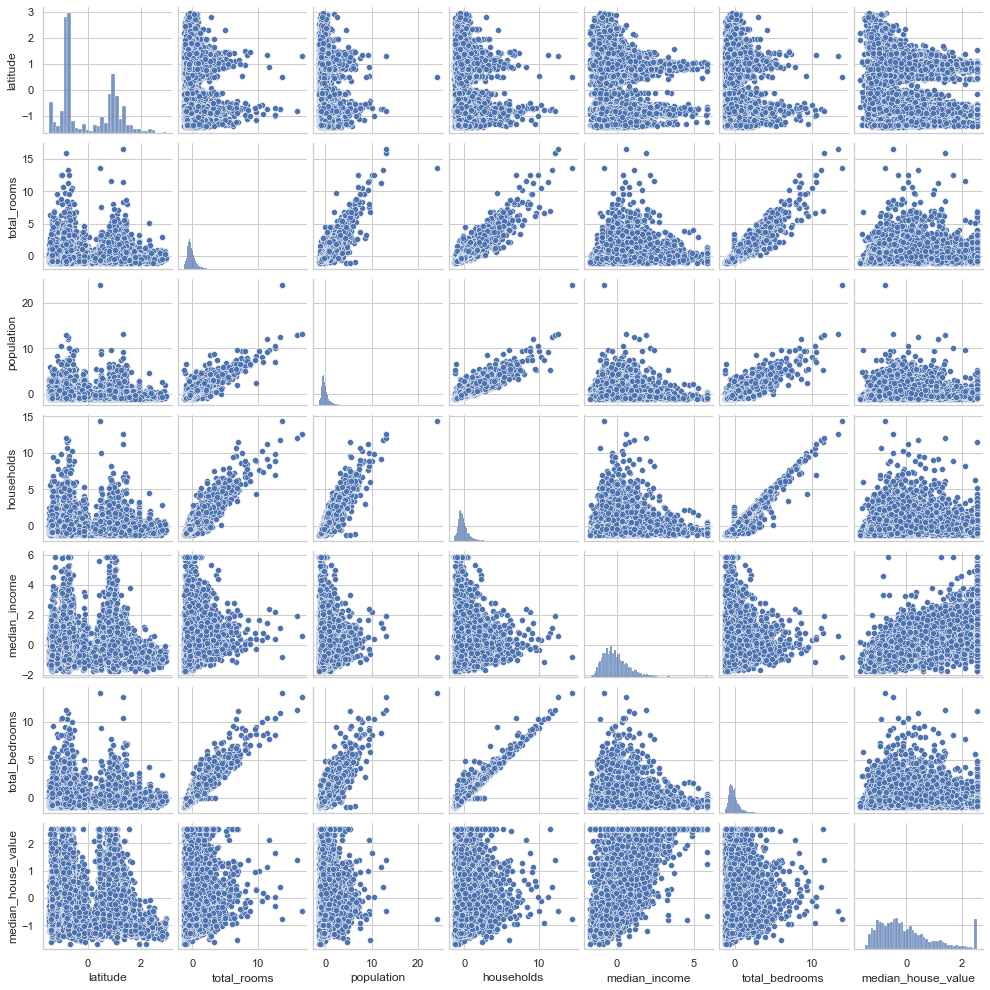

In [29]:
# To visualise the correlation with the help of graphs
import seaborn as sns
sns.set(style='whitegrid')
cols = ['latitude', 'total_rooms', 'population', 'households', 'median_income','total_bedrooms','median_house_value']
plt.figure(figsize=(10,15))
sns.pairplot(train_scaled[cols], height=2)

<AxesSubplot:>

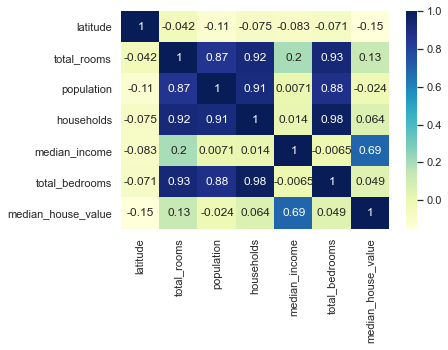

In [30]:
#Using heatmap
sns.heatmap(train_scaled[cols].corr().values, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, cmap="YlGnBu")

In [31]:
LR1.fit(X_train,Y_train)

LinearRegression()

In [32]:
Y_train_pred = LR1.predict(X_train)
Y_train_pred

array([[ 0.16612741],
       [ 0.63702632],
       [-0.62351088],
       ...,
       [ 0.37509705],
       [ 0.51732437],
       [-1.04634924]])

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(Y_train, Y_train_pred)            # The error between original and predicted data is 36%

0.36476951159274723

In [35]:
LR1.intercept_

array([-1.86346287e-15])

In [36]:
LR1.coef_

array([[-0.73648323, -0.78791212,  0.12029362, -0.11571389,  0.30986814,
        -0.41478397,  0.2585082 ,  0.65359077, -0.00341752]])

In [37]:
import numpy as np

In [38]:
ind = np.array(X_train.columns).reshape(-1,1)
pd.DataFrame(LR1.coef_.reshape(-1,1), index=ind, columns=['LR coef'])

,LR coef
"(longitude,)",-0.736483
"(latitude,)",-0.787912
"(housing_median_age,)",0.120294
"(total_rooms,)",-0.115714
"(total_bedrooms,)",0.309868
"(population,)",-0.414784
"(households,)",0.258508
"(median_income,)",0.653591
"(ocean_proximity,)",-0.003418


In [39]:
LR1.score(X_train,Y_train)                 # To get the R^2 value
                                           # The model accounts for 63% variation in the data

0.6352304884072526

In [40]:
# To predict output for test dataset using the fitted model.
Y_test_pred = LR1.predict(X_test)
Y_test_pred

array([[ 0.25367573],
       [-0.57270127],
       [-0.48604773],
       ...,
       [-1.056373  ],
       [-0.35126268],
       [ 0.87265325]])

### To print root mean squared error (RMSE) from Linear Regression.

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(Y_test, Y_test_pred)

0.36247721409446987

## Bonus exercise: Perform Linear Regression with one independent variable :
#### Extract just the median_income column from the independent variables (from X_train and X_test).

In [43]:
X_train[["median_income"]]

,median_income
0,0.367714
1,0.930745
2,-1.127069
3,0.395713
4,-0.754294
...,...
16507,-0.122003
16508,0.351767
16509,0.926219
16510,0.002255


In [44]:
X_test[["median_income"]]

,median_income
0,-0.041501
1,0.079642
2,0.114668
3,-0.860007
4,0.290010
...,...
4123,-0.608135
4124,-1.279478
4125,-1.148486
4126,-0.630783


### Perform Linear Regression to predict housing values based on median_income.

In [45]:
from sklearn.linear_model import LinearRegression
LR2 = LinearRegression()

In [46]:
med_income_train = X_train[['median_income']]

In [47]:
LR2.fit(med_income_train, Y_train)

LinearRegression()

In [48]:
LR2.intercept_, LR2.coef_               # y = B0 + B1x

(array([4.2959582e-17]), array([[0.68890402]]))

In [49]:
LR2.score(med_income_train,Y_train)                    # value of R^2

0.4745887546016089

In [50]:
med_income_test = X_test[["median_income"]]

In [51]:
Y_train_pred2 = LR2.predict(med_income_train)
Y_train_pred2

array([[ 0.25331982],
       [ 0.64119387],
       [-0.77644263],
       ...,
       [ 0.63807579],
       [ 0.00155338],
       [-0.49132003]])

In [52]:
Y_test_pred2 = LR2.predict(med_income_test)
Y_test_pred2

array([[-0.02859007],
       [ 0.05486592],
       [ 0.07899559],
       ...,
       [-0.79119639],
       [-0.43454903],
       [ 0.60524003]])

### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

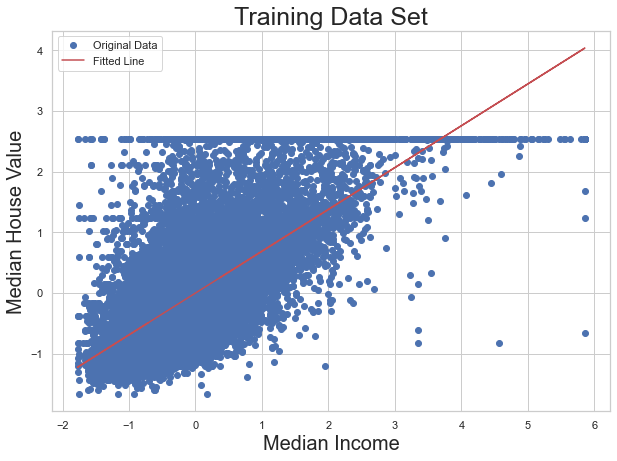

In [53]:
plt.figure(figsize = (10,7))
plt.plot(med_income_train, Y_train, 'bo', label = 'Original Data')
plt.plot(med_income_train, Y_train_pred2, 'r-', label='Fitted Line' )
plt.xlabel('Median Income', fontsize=20)
plt.ylabel('Median House Value', fontsize=20)
plt.title("Training Data Set",fontsize=25)
plt.legend(loc=2)

In [54]:
LR2.score(med_income_train,Y_train)           # To get the R^2 value
                                              # The model accounts for 47% variation in the data

0.4745887546016089

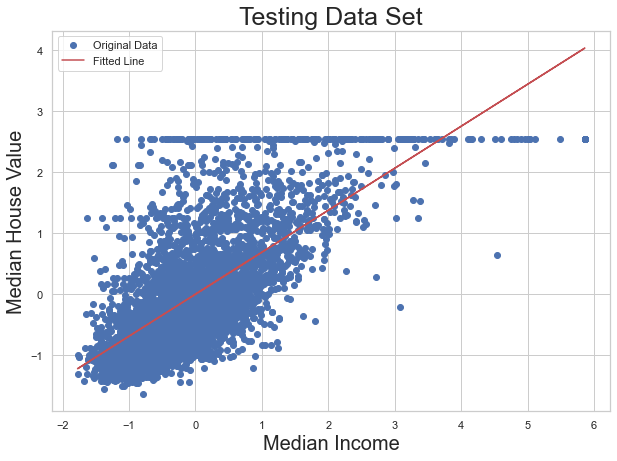

In [55]:
plt.figure(figsize = (10,7))
plt.plot(med_income_test, Y_test, 'bo', label = 'Original Data')
plt.plot(med_income_test, Y_test_pred2, 'r-', label='Fitted Line' )
plt.xlabel('Median Income', fontsize=20)
plt.ylabel('Median House Value', fontsize=20)
plt.title("Testing Data Set",fontsize=25)
plt.legend(loc=2)

In [56]:
LR2.score(med_income_test,Y_test)               # To get the R^2 value
                                                # The model accounts for 46% variation in the data

0.46888015509291614